In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3, 5, 7], 'criterion': ['gini', 'entropy']}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)  # exhaustive grid search
grid_search.fit(X_train, y_train)
print(f"Best parameters found: {grid_search.best_params_}")

# PARAMETERS:
# estimator --> model to optimize
# param_grid --> dictionary with parameters and values to test
# cv --> number of folds for cross-validation
# scoring --> strategy for evaluating the model
# n_jobs --> number of parallel processes to run

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipeline = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C=1))])  # sequentially run some processes

param_grid = {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf']}  # use the name of the process followed by '__' and the parameter name

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# PARAMETERS:
# list of tuples: (process_name, transformation_or_estimator)
# each name must be unique and without a final underscore

In [ ]:
make_classification()

# PARAMETERS:
# n_samples --> total number of samples
# n_features --> total number of features
# n_informative --> number of informative features
# random_state --> seed

In [ ]:
SVC()  # Support Vector Classification

# PARAMETERS:
# C --> regularization parameter
# kernel --> kernel type ('linear', 'poly', 'rbf', 'sigmoid')
# gamma --> kernel coefficient

In [1]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

# stratify --> if y, maintains class proportions in the splits

In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier

pipeline = Pipeline([('scaler', StandardScaler()), ('pca', PCA()), ('gbc', GradientBoostingClassifier(random_state=123))])

# standardize -> apply PCA -> apply gradient boosting classifier, a classification model based on boosting and ensembles

In [ ]:
param_dist = {
    'pca__n_components': sp_randint(5, 13),  # integer distribution between 5 (inclusive) and 13 (exclusive)
    'gbc__n_estimators': sp_randint(50, 200),
    'gbc__learning_rate': uniform(0.01, 0.2),  # uniform distribution [0.01, 0.01+0.2]
    'gbc__max_depth': sp_randint(1, 5),
    'gbc__subsample': uniform(0.6, 0.4),
    'gbc__min_samples_split': sp_randint(2, 10),
    'gbc__min_samples_leaf': sp_randint(1, 10),
    'gbc__max_features': ['auto', 'sqrt', 'log2', None]
}

# PARAMETERS:
# PCA
#   n_components --> number of principal components to keep
# GradientBoostingClassifier
#   n_estimators --> number of boosting rounds
#   learning_rate
#   max_depth --> maximum depth for each tree
#   subsample --> percentage of samples to use for each tree
#   min_samples_split --> minimum samples required to split a node
#   min_samples_leaf --> minimum samples required in each leaf (result of splitting a node)
#   max_features --> maximum number of features to consider when planning the next split

In [ ]:
from sklearn.model_selection import RandomizedSearchCV,StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)  # configure the cross-validation splitter, ensuring class proportions are maintained

random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=50, cv=cv, scoring='accuracy', random_state=42, n_jobs=-1)

# PARAMETERS:
# pipeline --> a previously-defined pipeline of processes
# param_distributions --> dictionary of parameters to search
# n_iter --> number of combinations of parameters to sample and test
# cv --> cross-validation method
# scoring --> performance metric to report
# random_state --> seed
# n_jobs --> number of cores to use for parallel computation; if -1, it will use all cores available

In [4]:
# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# PARAMETER:
# fit_intercept: (default True) --> if True, it will include an intercept
# normalize: (deprecated) --> if you need to standardize, do it BEFORE regressing
# copy_X: (default True) --> if True, it will copy the input data, otherwise it will overwrite it
# n_jobs --> number of cores to use for parallel computation; if -1, it will use all cores available

Coefficients: [ 4.39988248e-01  9.15770358e-03 -1.11827735e-01  6.47857908e-01
 -6.55068105e-06 -3.92330215e-03 -4.17033805e-01 -4.27676550e-01]
Intercept: -36.25561939898517


In [8]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.metrics import classification_report

data = load_wine()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  # seed 42 is a meme in the community

model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

# PARAMETERS:
# penalty: (default='l2') --> regularization criterion ('l1', 'l2', 'elasticnet', 'none')
# C: (default=1.0) --> inverse of the regularization strength; lower values mean a stronger regularization
# solver --> optimization algorithm ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga').
# max_iter: (default=100) --> maximum number of iterations for the optimization algorithm

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



c:\Users\Alessio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Alessio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

# PARAMETERS:
# criterion: (default='gini' for classification, 'mse' for regresion) --> criterion for split decisions ('gini', 'entropy', 'log_loss')
# max_depth --> maximum depth of the tree; if None, the nodes are expanded until all leaves will contain fewer than 'min_samples_split' samples
# min_samples_split: (default=2) --> minimum number of samples required for a node split
# min_samples_leaf: (default=1) --> minimum number of samples required in each leaf
# max_features --> maximum number of features to consider for splitting

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [11]:
# Support Vector Classifier (SVC)

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import classification_report

data = load_digits()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

# PARAMETERS:
# C: (default=1.0) --> regularization parameter
# kernel: (default='rbf') --> specify the kernel type ('linear', 'poly', 'rbf', 'sigmoid')
# degree: (default=3) --> degree of the polynomial kernel (only if kernel='poly')
# gamma: (default='scale') --> kernel coefficient ('scale', 'auto', or a float value)
# probability: (default=False) --> if True, it will estimate probabilities

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        36
           7       0.97      1.00      0.99        36
           8       1.00      0.94      0.97        35
           9       1.00      0.97      0.99        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



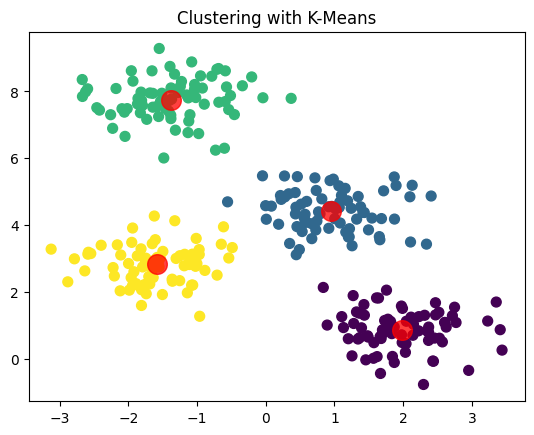

In [13]:
# K-means clustering

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# create synthetic data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=42)

kmeans.fit(X)

y_kmeans = kmeans.predict(X)

# visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centres = kmeans.cluster_centers_
plt.scatter(centres[:, 0], centres[:, 1], c='red', s=200, alpha=0.75)
plt.title('Clustering with K-Means')
plt.show()

# PARAMETERS:
# n_clusters: (default=8) --> number of clusters to create
# init: (default='k-means++') --> method for initializing the cluster means ('k-means++', 'random'); 'k-means++' auto-selects the initial means intelligently
# n_init: (default=10) --> number of times the clustering will be repeated
# max_iter: (default=300) --> maximum number of iterations for each clustering run
# tol: (default 1e-4) --> tolerance relative to the variance in inertia to declare convergence
# random_state --> seed

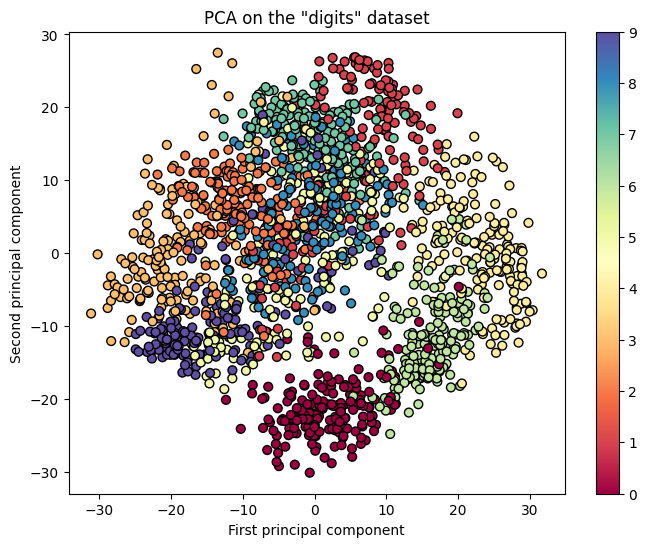

In [14]:
# Principal Component Analysis (PCA)

from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data
y = digits.target

pca = PCA(n_components=2, copy=True, whiten=False, svd_solver='auto', random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='Spectral', edgecolor='k', s=40)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('PCA on the "digits" dataset')
plt.colorbar(scatter)
plt.show()

# PARAMETERS:
# n_components --> components to keep, it can be:
#   integer --> first n principal components to keep
#   float between 0 and 1 --> cumulative explained variance to keep
#   'mle' --> select the number of components using the Maximum Likelihood Estimation (MLE) criterion
#   None --> maintains all principal components
# copy: (default True) --> if False, overwrite the input data
# whiten: (default False) --> if True, scale the principal components to have unit variance (1)
# svd_solver: (default 'auto') --> algorithm used to perform the Singular Value Decomposition (SVD)
#   'auto' --> automatically pick the most appropriate solver
#   'full' --> use a complete implementation of the SVD calculation
#   'arpack' --> truncate the SVD, useful for big datasets (more rapid)
#   'randomized' --> stochastic approximation of the SVD, also useful for big datasets
# random_state --> seed, more useful when the svd solver is 'arpack' or 'randomized' where variation can occur

In [15]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.datasets import load_wine
from sklearn.metrics import classification_report, confusion_matrix

data = load_wine()
X = data.data
y = data.target

model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, random_state=42)

scores = cross_val_score(estimator=model, X=X, y=y, cv=5, scoring='accuracy', n_jobs=-1)
print("Mean accuracy from cross-validation:", scores.mean())

param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [None, 5, 10], 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2']}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X, y)

print("Best parameter combination:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)

print("Classification report:")
print(classification_report(y, y_pred))

print("Confusion matrix:")
print(confusion_matrix(y, y_pred))

# PARAMETERS:
# RandomForestClassifier:
#   n_estimators: (default 100) --> number of trees in the forest
#   criterion: (default 'gini') --> criterion for splitting:
#       'gini': Gini index
#       'entropy': information gain
#   max_depth --> maximum depth for trees; if None, trees expand until all leaves are pure (1 point inside)
#   max_features --> number of features to consider when planning the next split:
#       'auto' or 'sqrt': square root of the total number of features
#       'log2': logarithm base 2 of the total number of features
#       None: all features
#   random_state --> seed
# cross_val_score:
#   estimator --> model to evaluate
#   X --> input features
#   y --> target labels
#   cv --> number of folds for the cross-validation
#   scoring --> performance metric
#   n_jobs --> number of parallel processes to run (cores used); if -1, uses all cores available
# GridSearchCV:
#   estimator --> model for which to optimize hyperparameters
#   param_grid --> dictionary with hyperparameters to test and all their corresponding values
#   cv --> number of fold for the cross-validation (when checking each parameter combination)
#   scoring --> performance metric
#   n_jobs --> number of parallel processes to run (cores used); if -1, uses all cores available

Mean accuracy from cross-validation: 0.9720634920634922
Best parameter combination: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        48

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178

Confusion matrix:
[[59  0  0]
 [ 0 71  0]
 [ 0  0 48]]


c:\Users\Alessio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
43 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Alessio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Alessio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Alessio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklear